# 1D time series prediction with differencing

Purpose of this notebook is to implement first order differencing to make a non-stationary timeseries stationary

In [1]:
# interactive figures
%matplotlib widget 

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# ml training code
from one_dimensional_time_series_forecasting import time_series_prediction
from one_dimensional_time_series_forecasting import invert_scaling
from one_dimensional_time_series_forecasting import hit_rate

# model evalution metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error


# data preprocessing
from sklearn.preprocessing import normalize
from sklearn.preprocessing import MinMaxScaler

2022-05-10 11:48:57.654489: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-05-10 11:48:57.654509: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
# import some data
df = pd.read_csv('./test_data/AirPassengers.csv') # sp_500 = GSPC.csv, # airplaine = AirPassengers.csv
# df = df.iloc[-2000:,:].reset_index(drop=True) # only look at last 2000 days
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


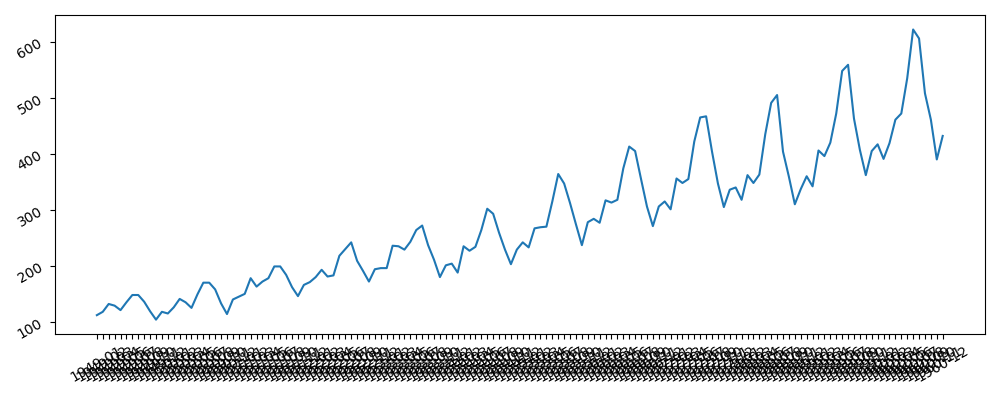

In [3]:
# plot original data
fig,ax = plt.subplots(figsize=(10,4))
ax.plot(df['Month'],df['#Passengers'])
# ax.set_xticks([df['Date'][i] for i in range(-2000,0,100)])
ax.tick_params(rotation=30)
plt.tight_layout()

# Attempt 1: creating stationary series by means of differencing

array([<AxesSubplot:>], dtype=object)

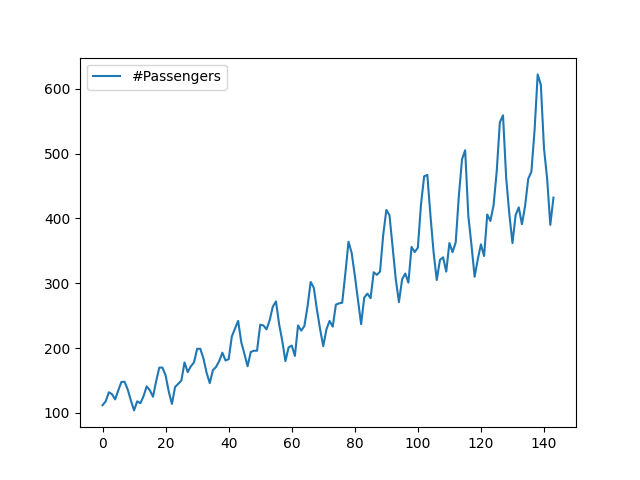

In [4]:
df.plot(subplots=True)

/tmp/ipykernel_4221/3620710672.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['diff'].iloc[0] = 0
/tmp/ipykernel_4221/3620710672.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['log_diff'].iloc[0] = 0


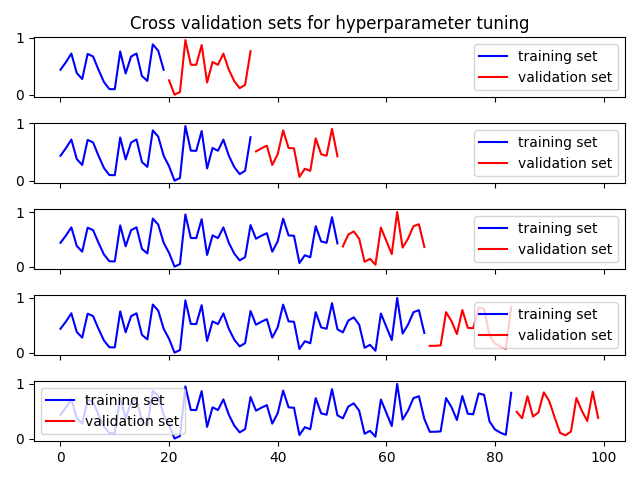

Training multivariate linear regression:

Linear regression coefficients: 
 [ 0.21073579 -0.0449212   0.25049905  0.6353662  -0.11156824 -0.25964539
 -0.1466502  -0.29718165 -0.19454909 -0.23468218 -0.1305246  -0.2978432
 -0.33582033 -0.24718047 -0.3497452 ]
MAPE: 0.7674516028164002
RMSE:  0.08909471430350954
MAE:  0.0710791727514673

Training support vector machine:


/home/tristan/my_venvs/meng-data-science/lib/python3.8/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/tristan/my_venvs/meng-data-science/lib/python3.8/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/tristan/my_venvs/meng-data-science/lib/python3.8/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/tristan/my_venvs/meng-data-science/lib/python3.8/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/tristan/my_ven

best_score:  -0.10784434606793292
best_model:  SVR(C=1, max_iter=5000, tol=1e-05)
best_params:  {'C': 1, 'kernel': 'rbf'}
MAPE: 1.1619638720502152
RMSE:  0.10790536293310937
MAE:  0.09100158380990388

Training MLP neural network: 
best_score:  -0.09710461871393426
best_model:  MLPRegressor(hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.0001,
             max_iter=5000, n_iter_no_change=200, shuffle=False)
best_params:  {'activation': 'relu', 'hidden_layer_sizes': (100, 100, 100), 'learning_rate': 'constant', 'learning_rate_init': 0.0001}
MAPE: 0.7674367972109017
RMSE:  0.08456293682224401
MAE:  0.0648706593462356

Naive model results:
MAPE: 2.2269351599268408
RMSE:  0.3363972248358409
MAE:  0.28369786746399145


,date,Value,Linear,SVM,NN,LSTM,Naive
0,1949-01,0.435636,None,None,None,NaN,None
1,1949-02,0.567622,None,None,None,NaN,None
2,1949-03,0.719198,None,None,None,NaN,None
3,1949-04,0.377492,None,None,None,NaN,None
4,1949-05,0.273715,None,None,None,NaN,None
...,...,...,...,...,...,...,...
139,1960-08,0.369726,0.449845,0.432488,0.410788,NaN,0.816712
140,1960-09,-0.010503,0.079455,0.139765,0.130401,NaN,0.369726
141,1960-10,0.190097,0.110038,0.23442,0.111782,NaN,-0.010503
142,1960-11,0.012632,0.1964,0.236843,0.165089,NaN,0.190097


NN:
MAPE: 0.486595587764937
RMSE:  0.033435293598008176
MAE:  0.025649174717016457
SVM:
MAPE: 0.5483558554107165
RMSE:  0.04266464276249105
MAE:  0.03598106672860397
Linear Regression:
MAPE: 0.5601587698267814
RMSE:  0.03522711063158
MAE:  0.028103955455621155


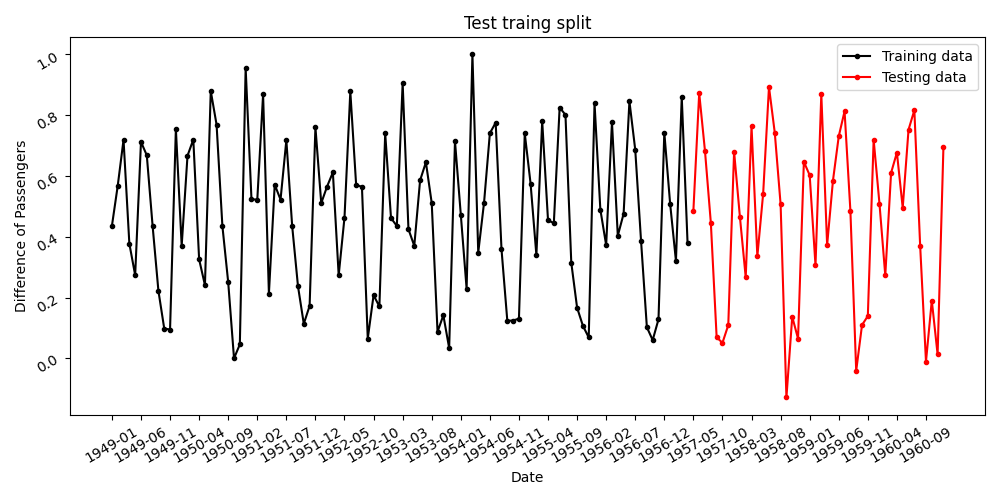

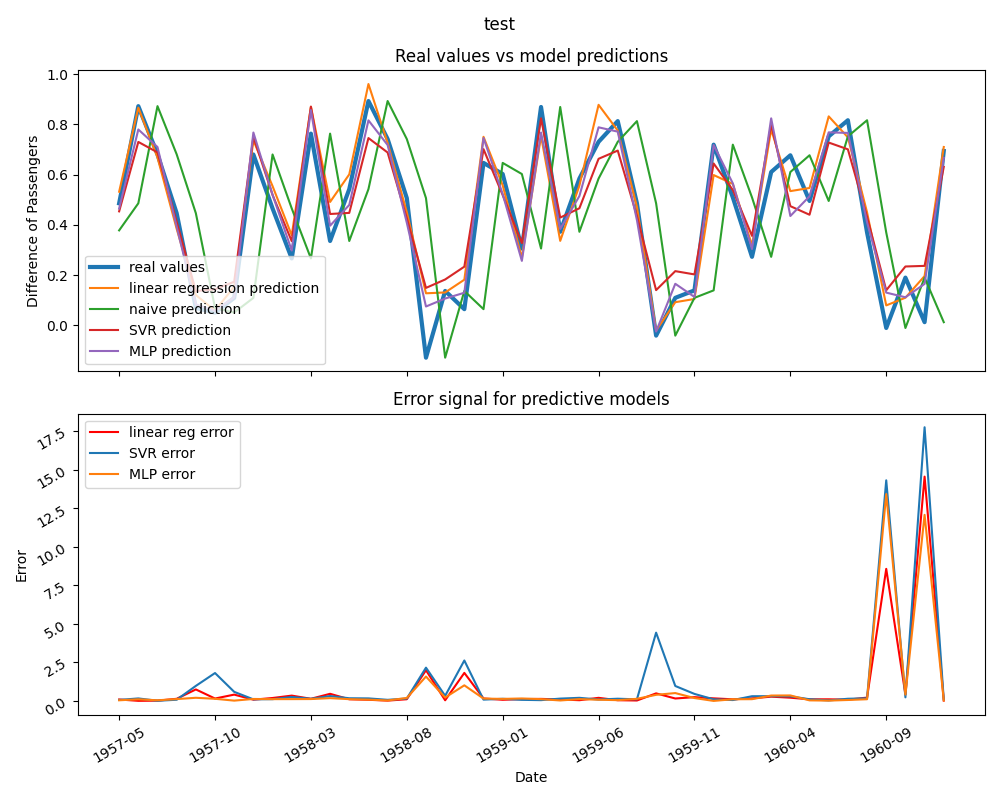

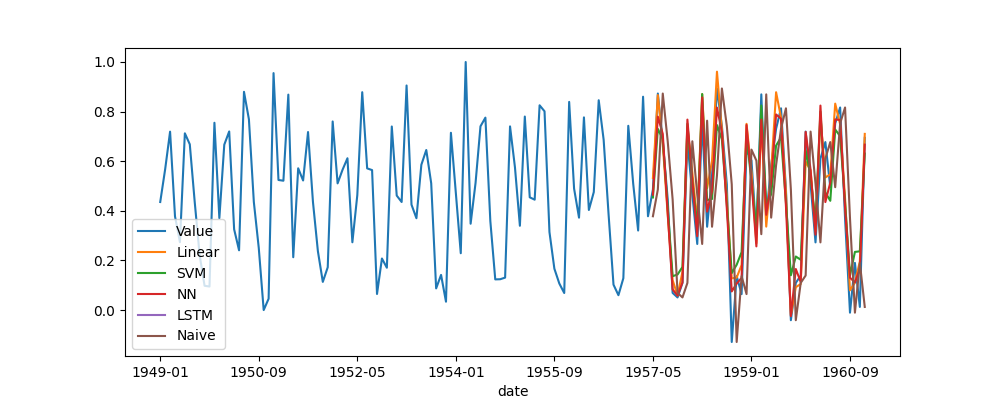

In [8]:
# import some data
df = pd.read_csv('./test_data/AirPassengers.csv') # sp_500 = GSPC.csv, # airplaine = AirPassengers.csv
# df = df.iloc[-2000:,:].reset_index(drop=True) # only look at last 2000 days

# difference data
df['#Passengers_log'] = df['#Passengers'].apply(lambda x: np.log(x))
df['diff'] = df['#Passengers'].diff(periods=1)
df['diff'].iloc[0] = 0
df['log_diff'] = df['#Passengers_log'].diff(periods=1)
df['log_diff'].iloc[0] = 0

# forecasting on new dataset
window_length = 15
split = 44

# scale data
scaler = MinMaxScaler()
scaled_training_data = scaler.fit_transform(df['log_diff'][0:-split].to_numpy().reshape(-1,1)).flatten()
scaled_test_data = scaler.transform(df['log_diff'][-split:].to_numpy().reshape(-1,1)).flatten()
data = np.append(scaled_training_data,scaled_test_data)

# initialize class object
differenced = time_series_prediction('test',df['Month'],data,window_length,1)#time_series_prediction(sp_500['Date'][-4000:],sp_500['Volume'][-4000:]/1e9,5,1) # pass: ime series dates, univariate time series, lag window length, a number of steps ahead to predict
differenced.sliding_window_1(verbose=0) # time series to supervised ML problem
differenced.train_test_split(split=split) # testing and training dataset split
differenced.test_train_plot(ylabel='Difference of Passengers',steps=5)    # visualize training split

# perform some prediction tasks
differenced.linear_regression()
differenced.support_vector_machine(model_tunning=True)
differenced.neural_net_mlp(model_tunning=True)
differenced.naive_model()

# visualize results
differenced.vis_results_time_series(second_plot='error',ylabel='Difference of Passengers',steps=5)

# collect results together nicely
differenced.collect_results()
differenced.results.plot(x='date',figsize=(10,4))
display(differenced.results)

# invert scaling and compute eval metric in orginal feature space
print('NN:')
inverted_predictions_nn, inverted_testing_data = invert_scaling(scaler,data[-split:],differenced.neural_net_predictions)

print('SVM:')
inverted_predictions_svm, inverted_testing_data = invert_scaling(scaler,data[-split:],differenced.svm_predictions)

print('Linear Regression:')
inverted_predictions_linear, inverted_testing_data = invert_scaling(scaler,data[-split:],differenced.linear_reg_predictions)


In [9]:
# invert difference + log
def invert_first_difference_with_log(prediction_split,lag_window,predictions,df_original):
    # first real value to work from
    beginnning_value = df_original['#Passengers_log'].iloc[-prediction_split] # this must be the column that is logged, before differencing
    beginning_date = df_original['Month'].iloc[-prediction_split]
    print(f'Beginning: {beginnning_value} at date: {beginning_date}')

    # determined predicted values
    total_dates = df_original.shape[0]
    total_prediction_range =  prediction_split
    count = 0
    previous_value = beginnning_value
    inverted = []
    for date in range(total_prediction_range):
        real_value = previous_value + predictions[date]
        inverted.append(real_value)
        previous_value = real_value

    # set all values before prediction start to zero
    zeros = [None for i in range(0,total_dates-prediction_split)]

    # append prediction results
    inverted_predictions = np.append(zeros,inverted)

    # tabulate
    df_results = pd.DataFrame(columns=['Date','Value','Pred Value'])
    df_results['Month'] = df_original['Month']
    df_results['Value'] = df_original['#Passengers']
    df_results['Pred Value'] = inverted_predictions
    df_results['Pred Value'] = df_results['Pred Value'][-prediction_split:].apply(lambda x: np.exp(x)) # inverting the log
    return df_results

In [10]:
# invert transform difference strategy

def invert_first_difference(prediction_split,lag_window,predictions,df_original):
    # first real value to work from
    beginnning_value = df_original['#Passengers'].iloc[-prediction_split]
    beginning_date = df_original['Month'].iloc[-prediction_split]
    print(f'Beginning: {beginnning_value} at date: {beginning_date}')

    # determined predicted values
    total_dates = df_original.shape[0]
    total_prediction_range =  prediction_split
    count = 0
    previous_value = beginnning_value
    inverted = []
    for date in range(total_prediction_range):
        real_value = previous_value + predictions[date]
        inverted.append(real_value)
        previous_value = real_value

    # set all values before prediction start to zero
    zeros = [None for i in range(0,total_dates-prediction_split)]

    # append prediction results
    inverted_predictions = np.append(zeros,inverted)

    # tabulate
    df_results = pd.DataFrame(columns=['Date','Value','Pred Value'])
    df_results['Month'] = df_original['Month']
    df_results['Value'] = df_original['#Passengers']
    df_results['Pred Value'] = inverted_predictions

    return df_results

Beginning: 5.872117789475416 at date: 1957-05
Beginning: 5.872117789475416 at date: 1957-05
Beginning: 5.872117789475416 at date: 1957-05
RMSE linear: 186.58335767787497
RMSE svm: 91.49237359893041
RMSE nn: 27.520646556811176

MAE linear: 161.2832137320518
MAE svm: 78.91729409646979
MAE nn: 22.392021211488213

mape linear: 0.3715627093293548
mape svm: 0.1869805945856214
mape nn: 0.05485617219267487

Linear Regression:
Movement prediction accuracy: 70.59 %
Confusion matrix:
[[36  2]
 [23 24]]
SVM:
Movement prediction accuracy: 69.41 %
Confusion matrix:
[[37  1]
 [25 22]]
NN:
Movement prediction accuracy: 69.41 %
Confusion matrix:
[[38  0]
 [26 21]]


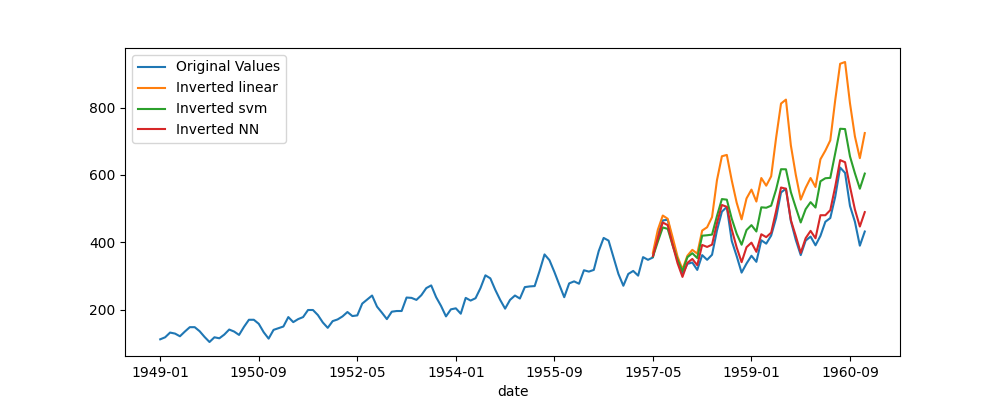

In [11]:
# invert results for different models
df_results_lin = invert_first_difference_with_log(split,window_length,inverted_predictions_linear,df)
df_results_svm = invert_first_difference_with_log(split,window_length,inverted_predictions_svm,df)
df_results_nn = invert_first_difference_with_log(split,window_length,inverted_predictions_nn,df)

# add all these dfs together
df_results = pd.DataFrame(columns=['date','Original Values','Inverted linear','Inverted svm','Inverted NN'])
df_results['date'] = df_results_lin['Month']
df_results['Original Values'] = df_results_lin['Value']#[-split:].apply(lambda x: np.exp(x))
df_results['Inverted linear'] = df_results_lin['Pred Value']#[-split:].apply(lambda x: np.exp(x))
df_results['Inverted svm'] = df_results_svm['Pred Value']#[-split:].apply(lambda x: np.exp(x))
df_results['Inverted NN'] = df_results_nn['Pred Value']#[-split:].apply(lambda x: np.exp(x))

# plot results
df_results.plot(figsize=(10,4),x='date')

# RMSE of this method
mse_lin = mean_squared_error(df_results['Original Values'].iloc[-split:],df_results['Inverted linear'].iloc[-split:])
mse_svm = mean_squared_error(df_results['Original Values'].iloc[-split:],df_results['Inverted svm'].iloc[-split:])
mse_nn = mean_squared_error(df_results['Original Values'].iloc[-split:],df_results['Inverted NN'].iloc[-split:])

# MAE of this method
mae_lin = mean_absolute_error(df_results['Original Values'].iloc[-split:],df_results['Inverted linear'].iloc[-split:])
mae_svm = mean_absolute_error(df_results['Original Values'].iloc[-split:],df_results['Inverted svm'].iloc[-split:])
mae_nn = mean_absolute_error(df_results['Original Values'].iloc[-split:],df_results['Inverted NN'].iloc[-split:])

# MAPE of this method
mape_lin = mean_absolute_percentage_error(df_results['Original Values'].iloc[-split:],df_results['Inverted linear'].iloc[-split:])
mape_svm = mean_absolute_percentage_error(df_results['Original Values'].iloc[-split:],df_results['Inverted svm'].iloc[-split:])
mape_nn = mean_absolute_percentage_error(df_results['Original Values'].iloc[-split:],df_results['Inverted NN'].iloc[-split:])


print(f'RMSE linear: {mse_lin**0.5}')
print(f'RMSE svm: {mse_svm**0.5}')
print(f'RMSE nn: {mse_nn**0.5}\n')

print(f'MAE linear: {mae_lin}')
print(f'MAE svm: {mae_svm}')
print(f'MAE nn: {mae_nn}\n')

print(f'mape linear: {mape_lin}')
print(f'mape svm: {mape_svm}')
print(f'mape nn: {mape_nn}\n')

# what is the accuracy of price movements for these predictions

# data to feed to hit_rate function:
dates = df_results['date'].iloc[split+window_length:]
original_values = df_results['Original Values'].iloc[split+window_length:]
lin_predictions = df_results['Inverted linear'].iloc[split+window_length:]
svm_predictions = df_results['Inverted svm'].iloc[split+window_length:]
nn_predictions =  df_results['Inverted NN'].iloc[split+window_length:]

# hit rate calculations
print('Linear Regression:')
df_lin = hit_rate(dates,original_values,lin_predictions)

print('SVM:')
df_svm = hit_rate(dates,original_values,svm_predictions)

print('NN:')
df_nn = hit_rate(dates,original_values,nn_predictions)
